# Introdução a RNN com Tensorflow

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers

In [45]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv")

In [46]:
data = data.rename(columns = {"Monthly milk production (pounds per cow)": "milk"})

In [47]:
data.head(6)

,Month,milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697


Vamos separar os dados por exemplo, da seguinte forma: 

[589, 561, 640] [656]


[561, 640, 656] [727]


[640, 656, 727] [697]

In [48]:
#função muito útil! não lembro aonde encontrei. fica ai o crédito ao possível autor
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Vamos testar com n_steps = 50, 15, 5 e 3

In [49]:
n_steps = 15
X, y = split_sequence(list(data["milk"]), n_steps)

In [50]:
# define model
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [51]:
X.shape

(153, 15)

In [52]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_train = X[1:100,:,:]
X_test = X[101:X.shape[0],:,:]

y_train = y[1:100]
y_test  = y[101:X.shape[0]]

In [53]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 15, 1)
(99, 15, 1)
(52, 15, 1)
(99,)
(52,)


In [54]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 8ms/step - loss: 377951.2812
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 269441.5000
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 159615.9062
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 58579.6172
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 7877.1099
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 32007.6113
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 8217.0635
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 6351.4224
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - loss: 11181.8193
Epoch 10/500
4/4 [==============================] - 0s 9ms/step - loss: 8905.3320
Epoch 11/500
4/4 [==============================] - 0s 11ms/step - loss: 4214.7690
Epoch 12/500
4/4 [==============================] - 0s 12ms/step - loss: 4078.9375
Epoch 13/

In [55]:
y_pred = model.predict(X_test)

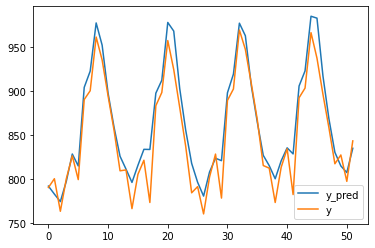

In [56]:
plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

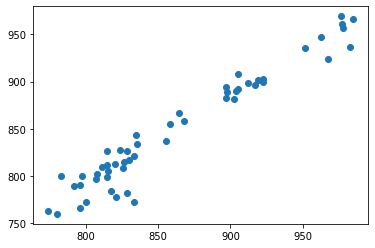

In [57]:
plt.scatter(y_pred, y_test)

In [58]:
data.tail()

,Month,milk
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [59]:
X_new = data["milk"][-n_steps:]

In [60]:
X_new

153    812
154    773
155    813
156    834
157    782
158    892
159    903
160    966
161    937
162    896
163    858
164    817
165    827
166    797
167    843
Name: milk, dtype: int64

In [61]:
X_new = np.array(X_new).reshape(1, n_steps, 1)

In [62]:
model.predict(X_new)

array([[851.3]], dtype=float32)

### Deep RNN

In [63]:
# define model
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [64]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 5s 35ms/step - loss: 444842.0938
Epoch 2/500
4/4 [==============================] - 0s 33ms/step - loss: 369719.0000
Epoch 3/500
4/4 [==============================] - 0s 37ms/step - loss: 396916.7812
Epoch 4/500
4/4 [==============================] - 0s 35ms/step - loss: 339390.3750
Epoch 5/500
4/4 [==============================] - 0s 34ms/step - loss: 329995.5625
Epoch 6/500
4/4 [==============================] - 0s 32ms/step - loss: 251161.4375
Epoch 7/500
4/4 [==============================] - 0s 33ms/step - loss: 159663.4375
Epoch 8/500
4/4 [==============================] - 0s 33ms/step - loss: 100282.3438
Epoch 9/500
4/4 [==============================] - 0s 34ms/step - loss: 95014.3672
Epoch 10/500
4/4 [==============================] - 0s 32ms/step - loss: 44391.0039
Epoch 11/500
4/4 [==============================] - 0s 32ms/step - loss: 45628.8945
Epoch 12/500
4/4 [==============================] - 0s 31ms/step - loss: 3392

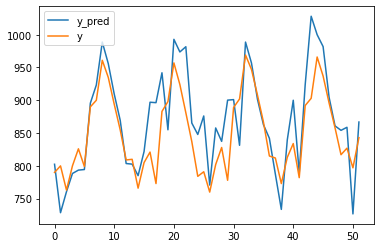

In [65]:
y_pred = model.predict(X_test)

plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

In [66]:
model.predict(X_new)

array([[878.10626]], dtype=float32)

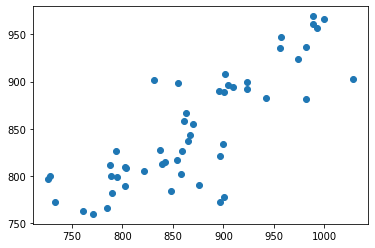

In [67]:
plt.scatter(y_pred, y_test)